In [1]:
print("Welcome to Python Automation using ETL process")

Welcome to Python Automation using ETL process


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

#Extract the Data from Flat File

In [3]:
df=pd.read_csv('TargetTransac.csv',encoding='latin1')

In [4]:
df.head(3)

,row,orderid,orderdate,ordermonth,ship_date,delay,ship_mode,cust_id,cust_name,segment,...,category,sub_category,product_name,sales,quantity,discount,profit,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,CA-2016-152156,08-11-2016,Nov,11-11-2016,3,Second Class,CG-12520,Claire Gute,Consumer,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136,NaN,NaN,NaN
1,2,CA-2016-152156,08-11-2016,Nov,11-11-2016,3,Second Class,CG-12520,Claire Gute,Consumer,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.0,219.5820,NaN,NaN,NaN
2,3,CA-2016-138688,12-06-2016,Jun,16-06-2016,4,Second Class,DV-13045,Darrin Van Huff,Corporate,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,6.8714,NaN,NaN,NaN


In [5]:
df.tail(3)

,row,orderid,orderdate,ordermonth,ship_date,delay,ship_mode,cust_id,cust_name,segment,...,category,sub_category,product_name,sales,quantity,discount,profit,Unnamed: 23,Unnamed: 24,Unnamed: 25
10207,8323,CA-2016-130778,19-11-2016,Nov,25-11-2016,6,Standard Class,ND-18370,Natalie DeCherney,Consumer,...,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,8.74,2.0,0.0,2.2724,NaN,NaN,NaN
10208,8324,CA-2016-130778,19-11-2016,Nov,25-11-2016,6,Standard Class,ND-18370,Natalie DeCherney,Consumer,...,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.75,5.0,0.0,20.5850,NaN,NaN,NaN
10209,8325,CA-2017-144456,08-09-2017,Sep,09-09-2017,1,First Class,FC-14245,Frank Carlisle,Home Office,...,Office Supplies,Storage,"Decoflex Hanging Personal Folder File, Blue",61.68,5.0,0.2,5.3970,NaN,NaN,NaN


In [6]:
df.shape

(10210, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10210 entries, 0 to 10209
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row           10210 non-null  int64  
 1   orderid       10210 non-null  object 
 2   orderdate     10210 non-null  object 
 3   ordermonth    10210 non-null  object 
 4   ship_date     10210 non-null  object 
 5   delay         10210 non-null  int64  
 6   ship_mode     10210 non-null  object 
 7   cust_id       10210 non-null  object 
 8   cust_name     10210 non-null  object 
 9   segment       10210 non-null  object 
 10  country       10210 non-null  object 
 11  city          10210 non-null  object 
 12  state         10210 non-null  object 
 13  postal_code   10210 non-null  int64  
 14  region        10210 non-null  object 
 15  product_id    10210 non-null  object 
 16  category      10210 non-null  object 
 17  sub_category  10210 non-null  object 
 18  product_name  10210 non-nu

In [8]:
df.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'ship_date', 'delay',
       'ship_mode', 'cust_id', 'cust_name', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

#Transform the Dataset || Data Preprocessing

In [9]:
df.duplicated().sum()

216

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(9994, 26)

In [12]:
df.isnull().sum()

row                0
orderid            0
orderdate          0
ordermonth         0
ship_date          0
delay              0
ship_mode          0
cust_id            0
cust_name          0
segment            0
country            0
city               0
state              0
postal_code        0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales             10
quantity          10
discount          11
profit            16
Unnamed: 23     9994
Unnamed: 24     9994
Unnamed: 25     9993
dtype: int64

In [13]:
df.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [14]:
df.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'ship_date', 'delay',
       'ship_mode', 'cust_id', 'cust_name', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [15]:
df.fillna({
    'sales': df['sales'].mean(),
    'quantity': df['quantity'].median(),
    'discount': df['discount'].mean(),
    'profit': df['profit'].median()
}, inplace=True)

In [16]:
df.isnull().sum()

row             0
orderid         0
orderdate       0
ordermonth      0
ship_date       0
delay           0
ship_mode       0
cust_id         0
cust_name       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
product_id      0
category        0
sub_category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row           9994 non-null   int64  
 1   orderid       9994 non-null   object 
 2   orderdate     9994 non-null   object 
 3   ordermonth    9994 non-null   object 
 4   ship_date     9994 non-null   object 
 5   delay         9994 non-null   int64  
 6   ship_mode     9994 non-null   object 
 7   cust_id       9994 non-null   object 
 8   cust_name     9994 non-null   object 
 9   segment       9994 non-null   object 
 10  country       9994 non-null   object 
 11  city          9994 non-null   object 
 12  state         9994 non-null   object 
 13  postal_code   9994 non-null   int64  
 14  region        9994 non-null   object 
 15  product_id    9994 non-null   object 
 16  category      9994 non-null   object 
 17  sub_category  9994 non-null   object 
 18  product_name  9994 non-null   obj

In [18]:
df.rename(columns={'ship_date':'shipdate', 'ship_mode':'shipmode','cust_id':'customerid','cust_name':'customername','postal_code':'postalcode', 'product_id':'productid',
'sub_category': 'subcategory', 'product_name':'productname'},inplace= True)

In [19]:
df.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'shipdate', 'delay',
       'shipmode', 'customerid', 'customername', 'segment', 'country', 'city',
       'state', 'postalcode', 'region', 'productid', 'category', 'subcategory',
       'productname', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [20]:
data=(df[['profit','sales','discount']]).round(1)

In [21]:
print(data)

      profit  sales  discount
0       41.9  262.0       0.0
1      219.6  731.9       0.0
2        6.9   14.6       0.0
3     -383.0  957.6       0.4
4        2.5   22.4       0.2
...      ...    ...       ...
9989     4.1   25.2       0.2
9990    15.6   92.0       0.0
9991    19.4  258.6       0.2
9992    13.3   29.6       0.0
9993    72.9  243.2       0.0

[9994 rows x 3 columns]


In [22]:
df.drop(['profit', 'sales', 'discount'], axis=1, inplace=True)

In [23]:
df.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'shipdate', 'delay',
       'shipmode', 'customerid', 'customername', 'segment', 'country', 'city',
       'state', 'postalcode', 'region', 'productid', 'category', 'subcategory',
       'productname', 'quantity'],
      dtype='object')

In [24]:
data_new = pd.concat([df, data], axis=1)

In [25]:
data_new.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'shipdate', 'delay',
       'shipmode', 'customerid', 'customername', 'segment', 'country', 'city',
       'state', 'postalcode', 'region', 'productid', 'category', 'subcategory',
       'productname', 'quantity', 'profit', 'sales', 'discount'],
      dtype='object')

In [26]:
print(data_new[['profit', 'sales', 'discount']])

      profit  sales  discount
0       41.9  262.0       0.0
1      219.6  731.9       0.0
2        6.9   14.6       0.0
3     -383.0  957.6       0.4
4        2.5   22.4       0.2
...      ...    ...       ...
9989     4.1   25.2       0.2
9990    15.6   92.0       0.0
9991    19.4  258.6       0.2
9992    13.3   29.6       0.0
9993    72.9  243.2       0.0

[9994 rows x 3 columns]


In [27]:
data_new.shape

(9994, 23)

In [28]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row           9994 non-null   int64  
 1   orderid       9994 non-null   object 
 2   orderdate     9994 non-null   object 
 3   ordermonth    9994 non-null   object 
 4   shipdate      9994 non-null   object 
 5   delay         9994 non-null   int64  
 6   shipmode      9994 non-null   object 
 7   customerid    9994 non-null   object 
 8   customername  9994 non-null   object 
 9   segment       9994 non-null   object 
 10  country       9994 non-null   object 
 11  city          9994 non-null   object 
 12  state         9994 non-null   object 
 13  postalcode    9994 non-null   int64  
 14  region        9994 non-null   object 
 15  productid     9994 non-null   object 
 16  category      9994 non-null   object 
 17  subcategory   9994 non-null   object 
 18  productname   9994 non-null   obj

In [29]:
data_new['orderdate'] = pd.to_datetime(data_new['orderdate'], format='mixed', dayfirst=True)
data_new['shipdate'] = pd.to_datetime(data_new['shipdate'], format='mixed', dayfirst=True)

In [30]:
data_new.columns == 'delay'

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [31]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row           9994 non-null   int64         
 1   orderid       9994 non-null   object        
 2   orderdate     9994 non-null   datetime64[ns]
 3   ordermonth    9994 non-null   object        
 4   shipdate      9994 non-null   datetime64[ns]
 5   delay         9994 non-null   int64         
 6   shipmode      9994 non-null   object        
 7   customerid    9994 non-null   object        
 8   customername  9994 non-null   object        
 9   segment       9994 non-null   object        
 10  country       9994 non-null   object        
 11  city          9994 non-null   object        
 12  state         9994 non-null   object        
 13  postalcode    9994 non-null   int64         
 14  region        9994 non-null   object        
 15  productid     9994 non-null   object       

In [32]:
data_new['delay']=data_new['orderdate']- data_new['shipdate']

In [33]:
data_new.columns

Index(['row', 'orderid', 'orderdate', 'ordermonth', 'shipdate', 'delay',
       'shipmode', 'customerid', 'customername', 'segment', 'country', 'city',
       'state', 'postalcode', 'region', 'productid', 'category', 'subcategory',
       'productname', 'quantity', 'profit', 'sales', 'discount'],
      dtype='object')

In [34]:
filtered = data_new[data_new['profit'] < 0]
print(filtered['profit'].value_counts())

profit
-4.8       15
-1.4       15
-2.7       15
-3.0       13
-2.0       13
           ..
-1480.0     1
-427.4      1
-40.8       1
-46.9       1
-54.3       1
Name: count, Length: 829, dtype: int64


In [35]:
print(len(filtered))

1855


In [36]:
sales_summary= data_new.groupby("region")["sales"].sum().reset_index()
print(sales_summary)

    region     sales
0  Central  501006.8
1     East  678607.3
2    South  391728.8
3     West  724755.3


In [37]:
import matplotlib.pyplot as plt

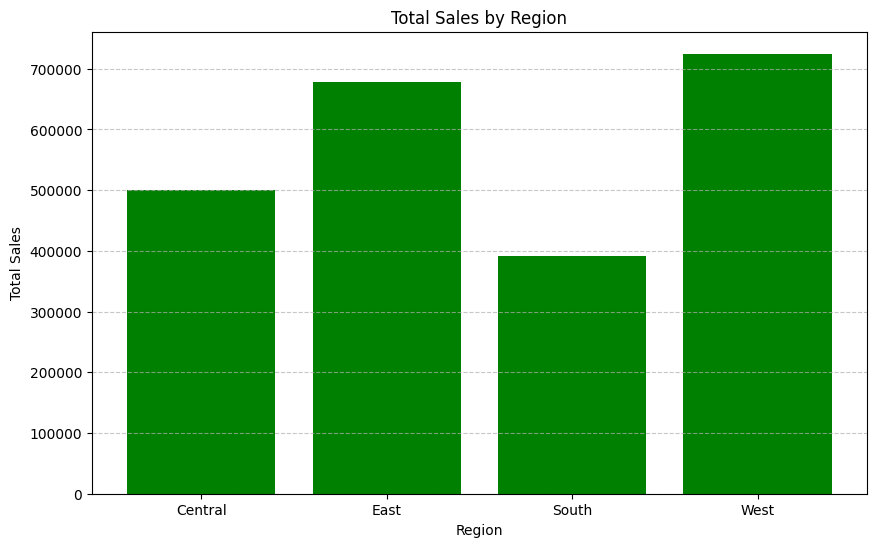

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(sales_summary['region'], sales_summary['sales'], color= 'green')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.show()

In [39]:
quantity_summary= data_new.groupby("region")["quantity"].sum().reset_index()
print(quantity_summary)

    region  quantity
0  Central    8766.0
1     East   10622.0
2    South    6209.0
3     West   12263.0


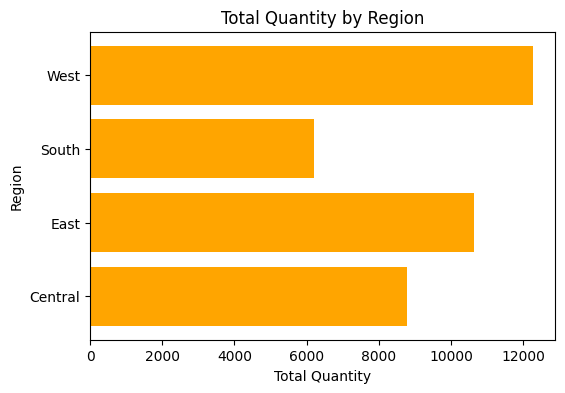

In [40]:
plt.figure(figsize=(6, 4))
plt.barh(quantity_summary['region'], quantity_summary['quantity'], color='orange')
plt.title("Total Quantity by Region")
plt.xlabel("Total Quantity")
plt.ylabel("Region")
plt.show()

Load the dataset for further analysis

In [41]:
data_new.to_csv('detail.csv',index=False)